In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_15000.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_50000.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_5000.csv


In [2]:
df1 = pd.read_csv(os.path.join(dirname,'AIDS_Classification.csv'))

# Dataframe Info

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [4]:
print(f"no of columns : {len(df1.columns)} \nshape of dataset{df1.shape}")

no of columns : 23 
shape of dataset(2139, 23)


In [5]:
df1.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')

In [6]:
#no object type columns
df1.select_dtypes(exclude   = "object").columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')

In [7]:
#Object type columns in the df1
object_type = ['trt','hemo','homo','infected','drugs','karnof','oprior','z30','race','gender',"str2","strat","symptom","treat","offtrt"]

In [8]:
df1 = df1.astype({'trt':'object','hemo':'object','homo':'object','infected':'object','drugs':'object','karnof':'object','oprior':'object','z30':'object','race':'object','gender':'object',"str2":'object',"strat":'object',"symptom":'object',"treat":'object',"offtrt":'object'})

In [9]:
df1.select_dtypes(include = 'object').columns

Index(['trt', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'race',
       'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt', 'infected'],
      dtype='object')

In [10]:
df1.select_dtypes(exclude = 'object').columns

Index(['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820'], dtype='object')

In [11]:
df1.isnull().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

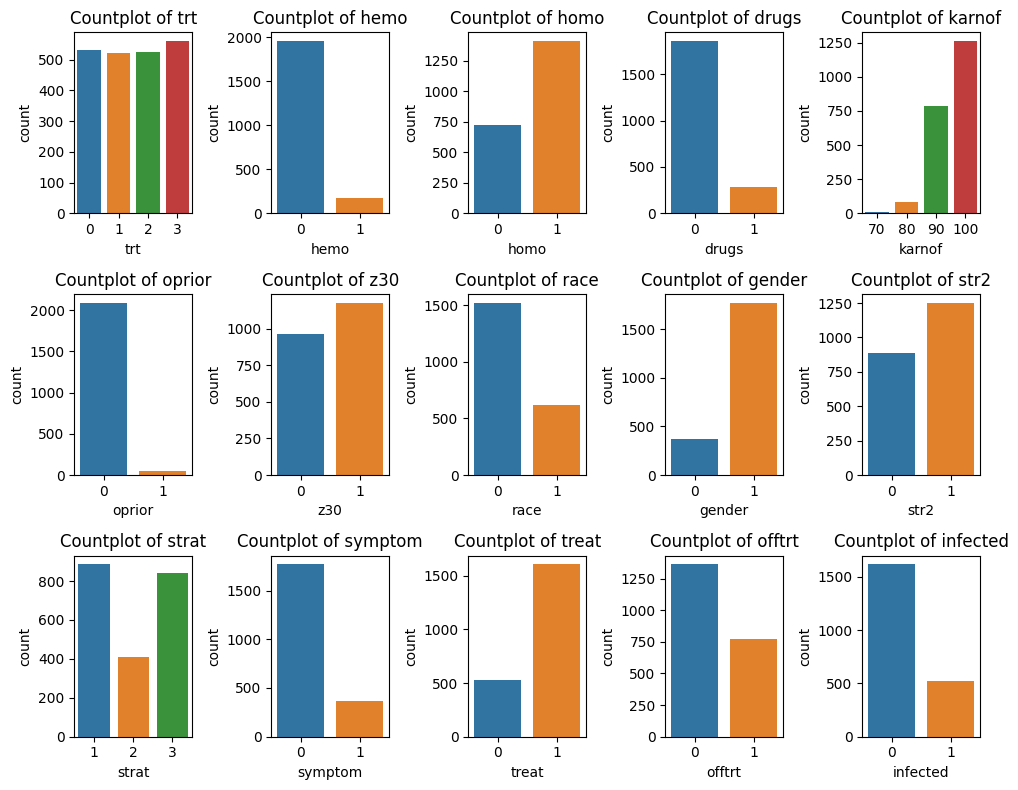

In [12]:
#countplot of all object type variables
plt.figure(figsize = (10,8))
for i in range(len(df1.select_dtypes(include = 'object').columns)):
    plt.subplot(3,5,i+1)
    sns.countplot(df1,x = df1.select_dtypes(include = 'object').columns[i])
    plt.title(f"Countplot of {df1.select_dtypes(include = 'object').columns[i]}")

plt.tight_layout()
plt.show()

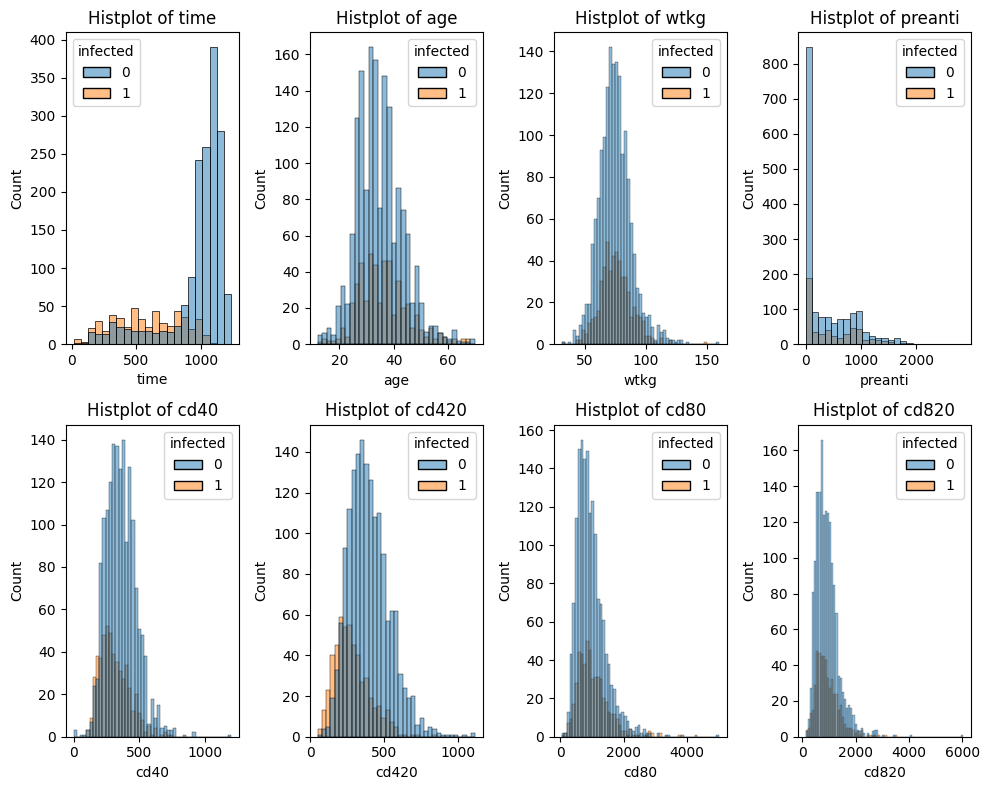

In [13]:
#histplot of int type variable with respect to infected
plt.figure(figsize = (10,8))
for i in range(len(df1.select_dtypes(exclude = 'object').columns)):
    plt.subplot(2,4,i+1)
    sns.histplot(df1,x = df1.select_dtypes(exclude = 'object').columns[i], hue = 'infected',legend=True)
    plt.title(f"Histplot of {df1.select_dtypes(exclude = 'object').columns[i]}")
plt.tight_layout()
plt.show()

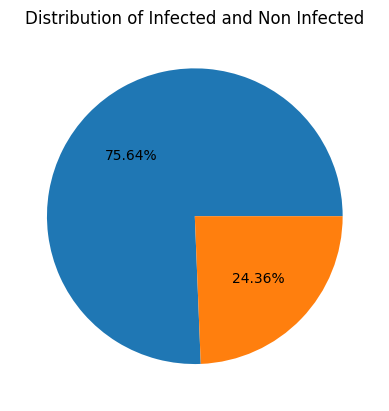

In [14]:
#dataset is disbalanced
plt.title(f"Distribution of Infected and Non Infected")
plt.pie(df1['infected'].value_counts(),autopct='%.2f%%')
plt.show()

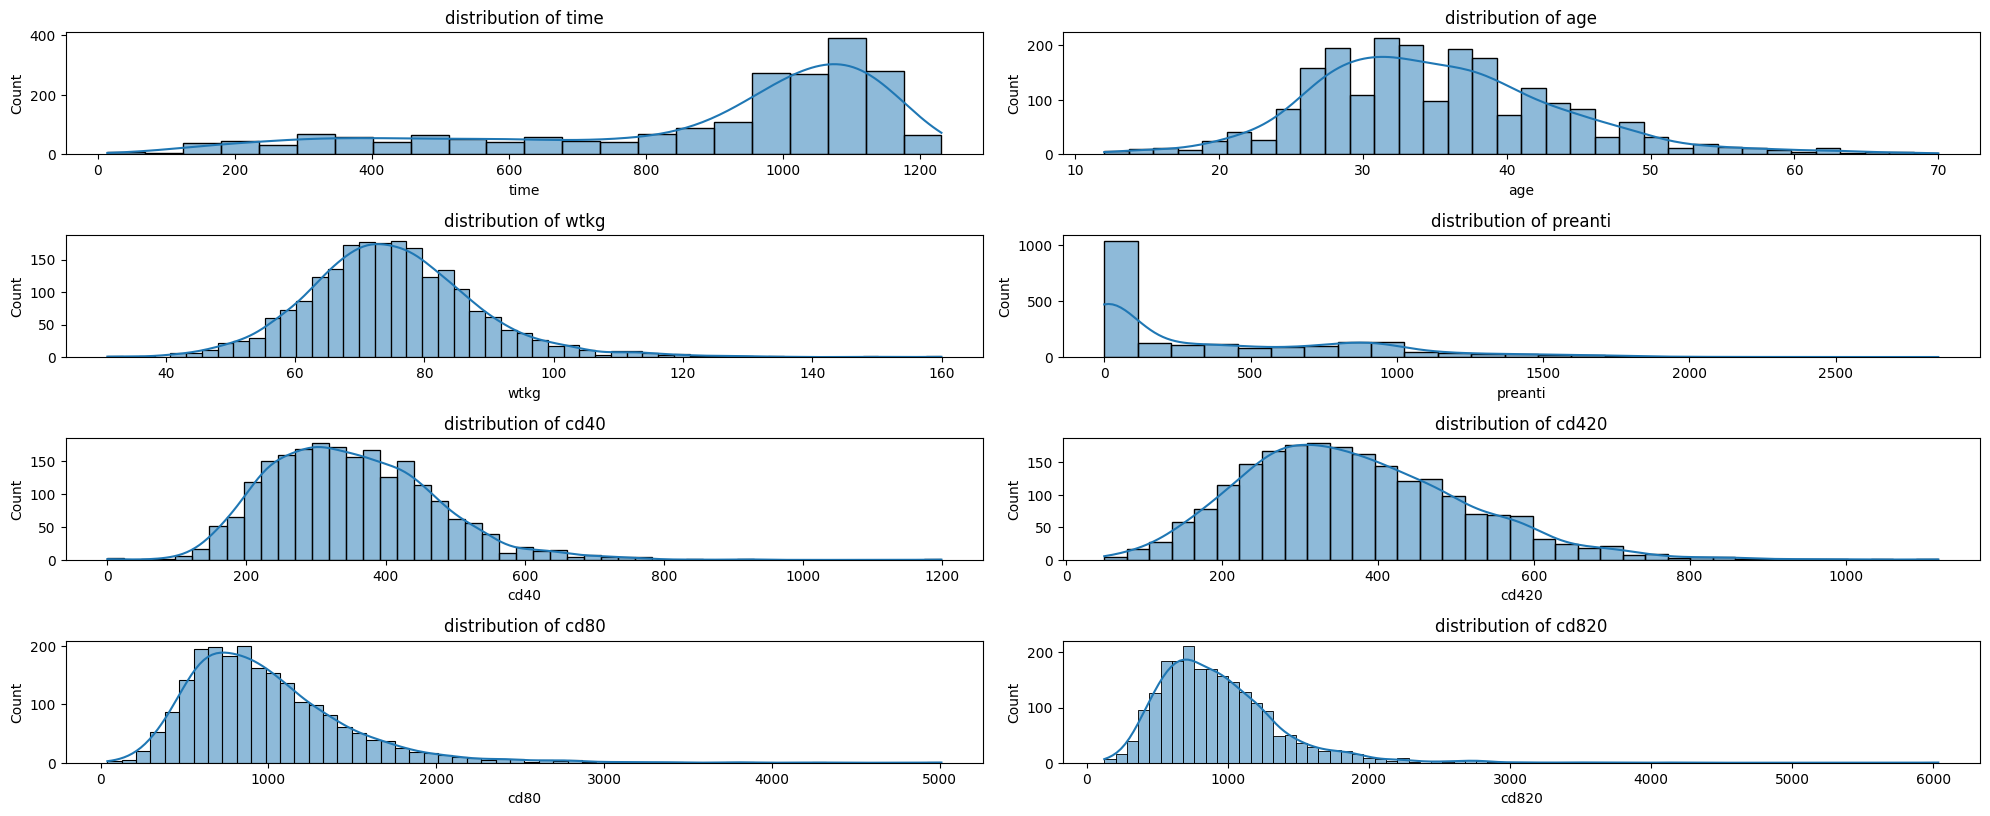

In [15]:
#distribution of all the numeric variables
df1_num = df1.select_dtypes(exclude = 'object')
plt.figure(figsize = (20,20))
for i in range(len(df1_num.columns)):
    plt.subplot(10,2,i+1)
    plt.title(f"distribution of {df1_num.columns[i]}")
    sns.histplot(df1_num,x = df1_num.columns[i], kde =True)
plt.tight_layout()
plt.show()

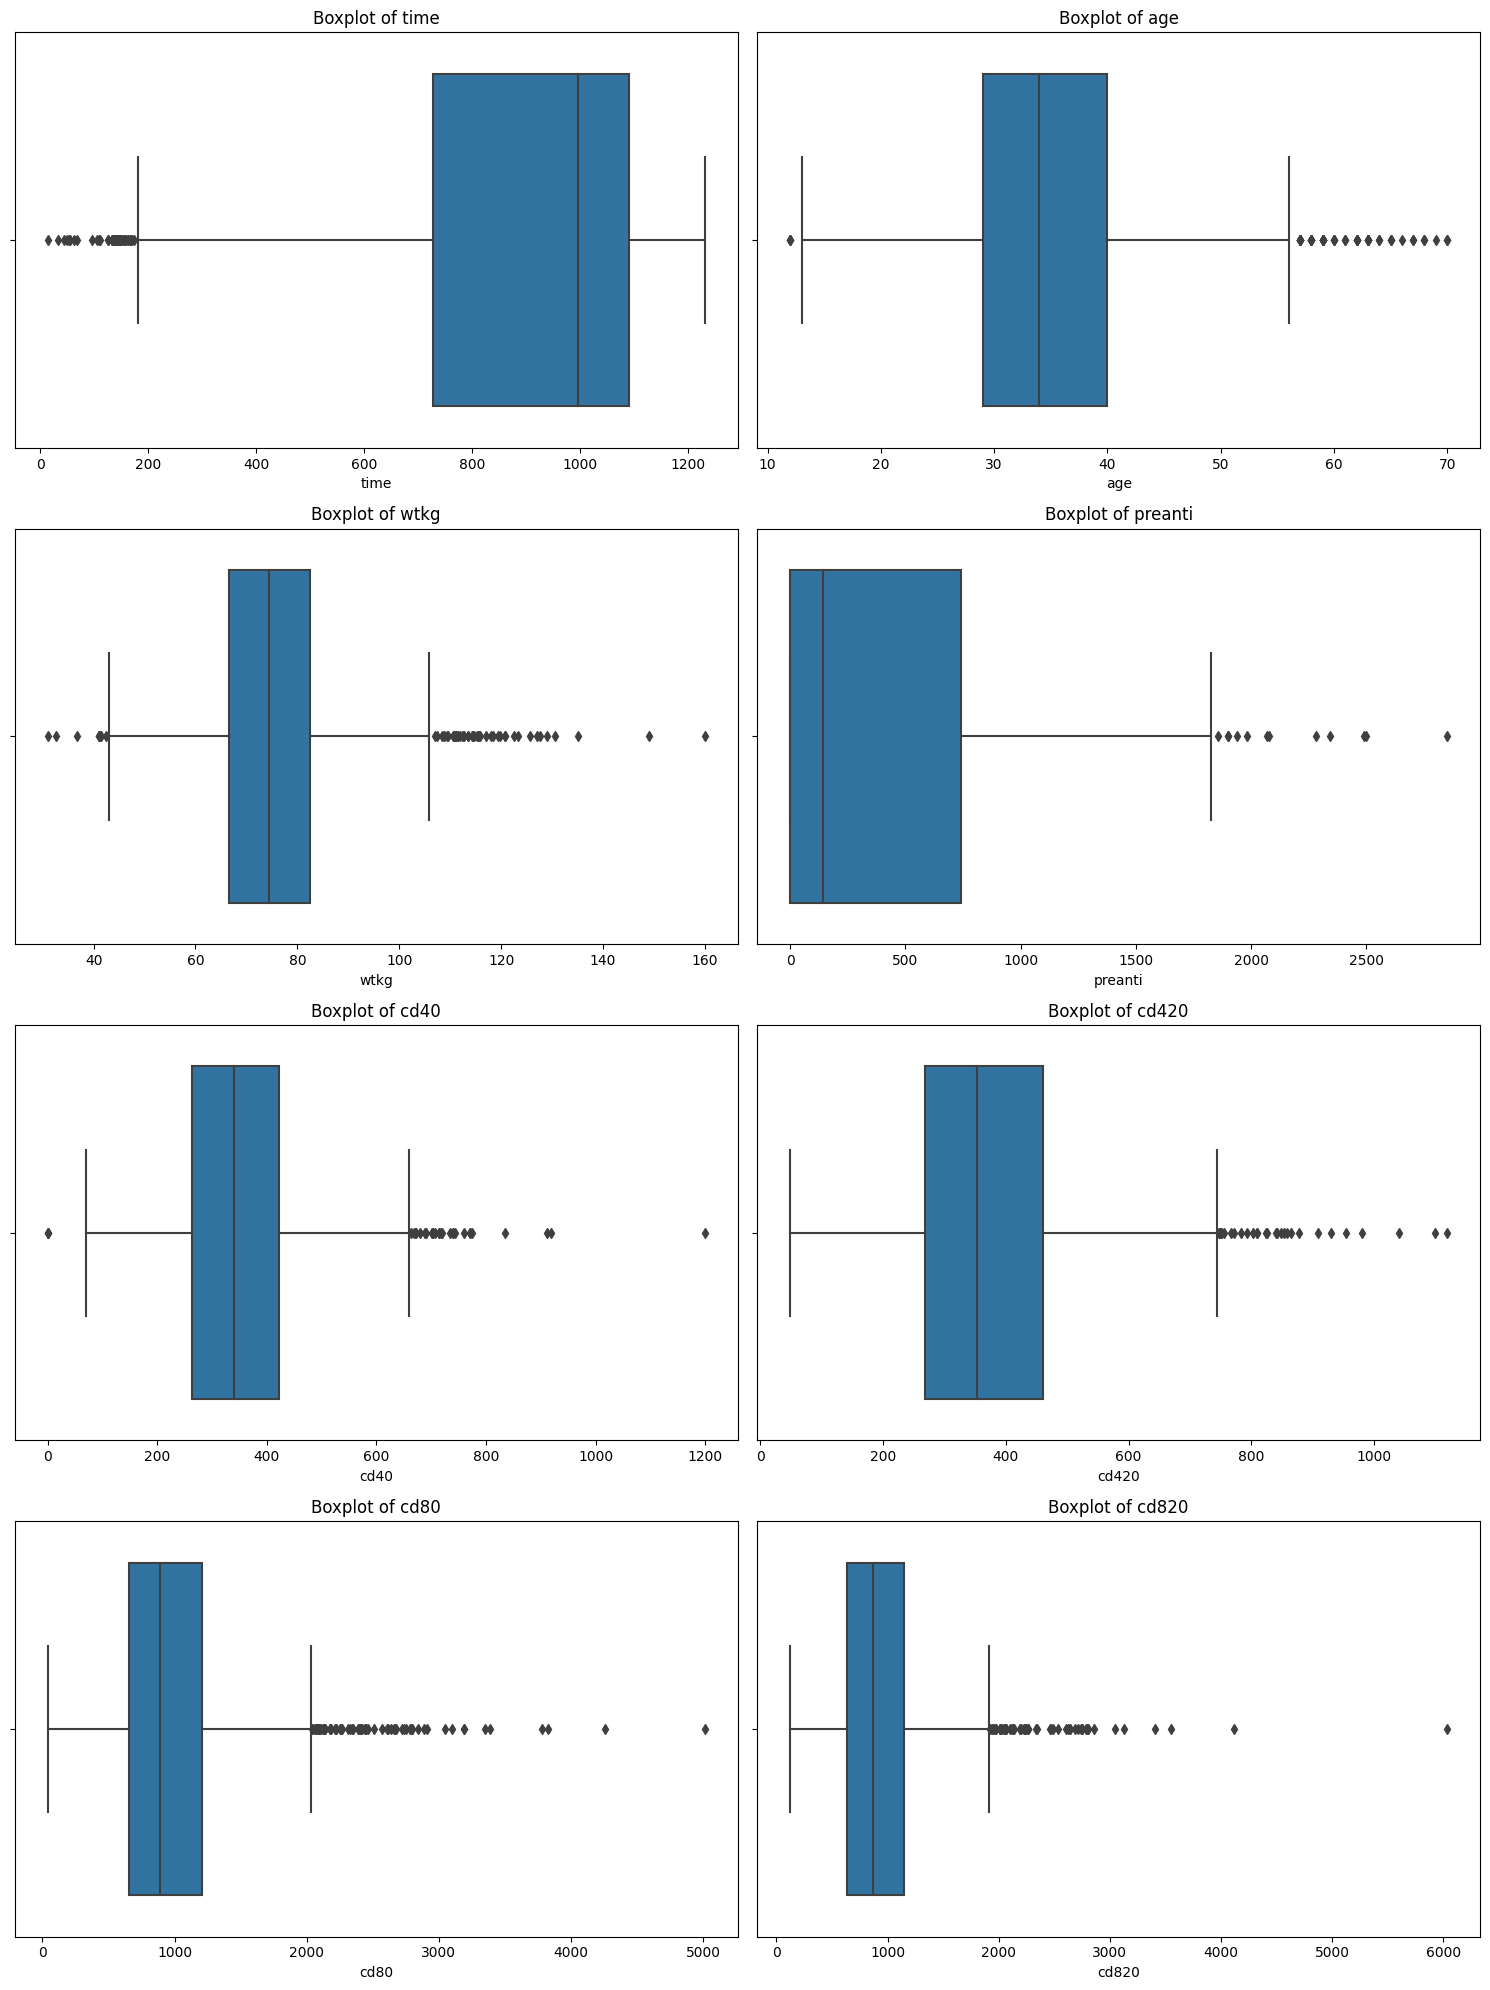

In [16]:
#boxplots of all the numeric columns
plt.figure(figsize = (15,20))
for i in range(len(df1_num.columns)):
    plt.subplot(4,2,i+1)
    plt.title(f"Boxplot of {df1_num.columns[i]}")
    sns.boxplot(df1_num,x = df1_num.columns[i])
plt.tight_layout()
plt.show()

# Inferences from Data Visualization

##### 1. {gender, homo, hemo, drugs, karnof} have disbalanced data in these columns.
##### 2. {oprior} is highly unbalanced.
##### 3. Target column {Infected} has a distribution of 75% Not Infected to 25% Infected values need to apply smote.
##### 4. Data appears to be normally distributed and maybe skewed towards positive or the negative side.


# Outlier Treatment

In [17]:
def outliers(dfx,target):

    df_num=dfx.select_dtypes(exclude = 'object')
    if target in df_num.columns:
        df_num.drop(columns = [target],axis = 1)
    else:
        pass
    list2=list(df1.columns).pop(list(df1.columns).index(target))
    list1= []
    for i in df_num.columns:
        q1 = np.nanquantile(dfx[i],0.25)
        q3 = np.nanquantile(dfx[i],0.75)
        iqr = q3-q1
        upper_lim = q1 - 1.5*(iqr)
        lower_lim = q3 + 1.5*(iqr)
        count = 0
        list1.append([i,len(dfx[(dfx[i]>lower_lim) | (dfx[i]<upper_lim)]),f"{round((len(dfx[(dfx[i]>lower_lim) | (dfx[i]<upper_lim)]))/len(df1),1)}%"])
    dfy = pd.DataFrame(list1,columns =['Columns','Outliers','Percent outliers'])    
    
    return dfy

In [18]:
49/len(df1)

0.022907900888265546

In [19]:
outliers(df1,'infected')

,Columns,Outliers,Percent outliers
0,time,49,0.0%
1,age,52,0.0%
2,wtkg,54,0.0%
3,preanti,12,0.0%
4,cd40,31,0.0%
5,cd420,30,0.0%
6,cd80,71,0.0%
7,cd820,59,0.0%


#### 

#### Outliers are very low in the dataset {below 0.1% for each column}

# Null Value Treatment

In [20]:
#visual representation of missing values in the dataset
df1.isnull().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [21]:
# Duplicates in the dataset
df1.duplicated().sum()

0

##### No null data in the DataFrame

# Correlation Treatment

In [22]:
df1_corr = df1.select_dtypes(exclude = 'object')

<Axes: >

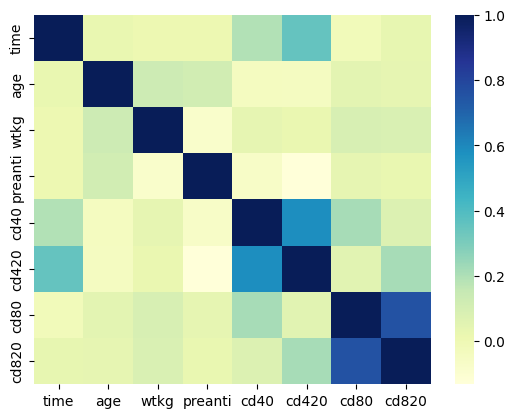

In [23]:
sns.heatmap(df1_corr.corr(),cmap = 'YlGnBu')

In [24]:
#A function to find out highly corr vars and make a dict of the vars
def high_corr_fx(dfx,corr,target):
    df_corr= dfx.select_dtypes(exclude = "object")
    dict_corr= {}
    dict_pop=[]
    
    
    for i in df_corr.columns:
        dict_corr[i] = []
    
    
    for i in df_corr.columns:
        for j in df_corr.columns:
            if (i == j) or (i == target) or (j == target):
                pass
            else:
                if(abs(df1[i].corr(df1[j])) >= corr):
                    if((i not in dict_corr[j]) and (j not in dict_corr[i])):
                        dict_corr[i].append(j)
                    else:
                        pass
                else:
                    pass
    
    
    for i in dict_corr.keys():
        if (len(dict_corr[i]) == 0):
            dict_pop.append(i)
        else:
            pass
        
    for i in dict_pop:
        dict_corr.pop(i)
    
    
    return dict_corr

In [25]:
#columns with corr higher than 0.7
high_corr_fx(df1_corr,0.7,'infected')

{'cd80': ['cd820']}

In [26]:
#dropping columns with high correlation
df1.drop(columns = ['cd80'],inplace =True)

# Standard Scaling

In [27]:
df_num = df1.select_dtypes(exclude = 'object')
df_cat = df1.select_dtypes(include = 'object')

In [28]:
from sklearn.preprocessing import StandardScaler as ss

scaled_df_num=pd.DataFrame(ss().fit_transform(df_num),columns = df_num.columns)

In [29]:
df1_scaled = pd.concat([scaled_df_num,df_cat],axis = 1)

In [30]:
for i in df1_scaled.select_dtypes(include = 'object').columns:
    df1_scaled[i] = df1_scaled[i].astype("int64")

In [31]:
y = df1_scaled['infected']
df1_scaled.drop(columns = 'infected', inplace = True)

# Smote Analysis

In [32]:
from sklearn.model_selection import train_test_split as tts
from imblearn.over_sampling import SMOTE

In [33]:
x_train, x_test, y_train, y_test = tts(df1_scaled,y,test_size = 0.2,random_state = 20)

In [34]:
x_train_resampled, y_train_resampled = SMOTE().fit_resample(x_train, y_train)

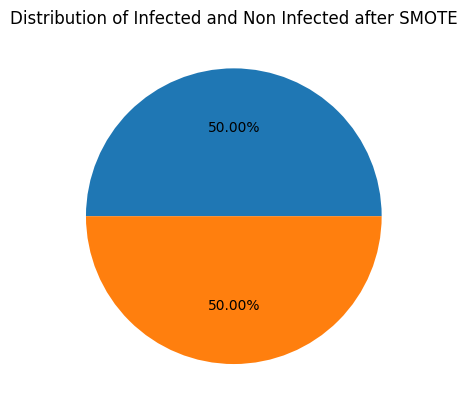

In [35]:
#distribution of y after resampling 
plt.title(f"Distribution of Infected and Non Infected after SMOTE")
plt.pie(y_train_resampled.value_counts(),autopct='%.2f%%')
plt.show()

# Model Builduing

In [36]:
from sklearn.linear_model import LogisticRegression as le
from sklearn.metrics import classification_report

In [37]:
model = le().fit(x_train_resampled, y_train_resampled)

In [38]:
y_pred = model.predict(x_test)

# Evaluation Metrics

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       338
           1       0.65      0.73      0.69        90

    accuracy                           0.86       428
   macro avg       0.79      0.81      0.80       428
weighted avg       0.87      0.86      0.86       428



# Conclusion

In [40]:
# we have achieved the model accuracy of 0.87 and with a very high precion recall for both classws as well as high f1_score